# Tasks to Do/Questions

*   Examining the relationship between job satisfaction levels (independent variable) and the dependent variables (age, daily rate, and monthly income). Here is a set of questions to guide the analysis:

*   Do different levels of job satisfaction affect employees’ age, daily rate, and monthly income?

*   Is there a significant difference in age across different job satisfaction levels?

* Is there a significant difference in daily rate across different job satisfaction levels?

* Is there a significant difference in monthly income across different job satisfaction levels?

* Which of the dependent variables (age, daily rate, or monthly income) contributes most to the differences between job satisfaction levels?

* Are there any interactions or patterns in the relationships between age, daily rate, and monthly income when grouped by job satisfaction levels?


Note: Check all assumptions underlying the use of one-way MANOVA.



In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
import pandas as pd
from scipy.stats import shapiro, levene
from statsmodels.multivariate.manova import MANOVA
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.multivariate.manova import MANOVA
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import shapiro
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
file_path = '/content/drive/MyDrive/APPLIED MULTIVARIATE/FA5/employee_attrition_train.csv'
try:
    employee_data = pd.read_csv(file_path)
except FileNotFoundError:
    print(f"Error: File not found at {file_path}")
    exit()


employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,50.0,No,Travel_Rarely,1126.0,Research & Development,1.0,2,Medical,1,997,...,3,80,1,32,1,2,5,4,1,3
1,36.0,No,Travel_Rarely,216.0,Research & Development,6.0,2,Medical,1,178,...,4,80,2,7,0,3,3,2,0,1
2,21.0,Yes,Travel_Rarely,337.0,Sales,7.0,1,Marketing,1,1780,...,2,80,0,1,3,3,1,0,1,0
3,50.0,No,Travel_Frequently,1246.0,Human Resources,NaN,3,Medical,1,644,...,3,80,1,32,2,3,32,5,10,7
4,52.0,No,Travel_Rarely,994.0,Research & Development,7.0,4,Life Sciences,1,1118,...,4,80,0,18,4,3,8,6,4,0


# Data Cleaning

In [4]:
print(employee_data.isnull().sum())

print(employee_data.columns)

Age                         136
Attrition                     0
BusinessTravel                5
DailyRate                    27
Department                    0
DistanceFromHome             95
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 5
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [5]:
# Mean or Median Imputation for continuous variables
employee_data['Age'] = employee_data['Age'].fillna(employee_data['Age'].median())
employee_data['DailyRate'] = employee_data['DailyRate'].fillna(employee_data['DailyRate'].median())
employee_data['DistanceFromHome'] = employee_data['DistanceFromHome'].fillna(employee_data['DistanceFromHome'].median())

# Mode Imputation for categorical variables
employee_data['BusinessTravel'] = employee_data['BusinessTravel'].fillna(employee_data['BusinessTravel'].mode()[0])
employee_data['MaritalStatus'] = employee_data['MaritalStatus'].fillna(employee_data['MaritalStatus'].mode()[0])


print(employee_data.isnull().sum())

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

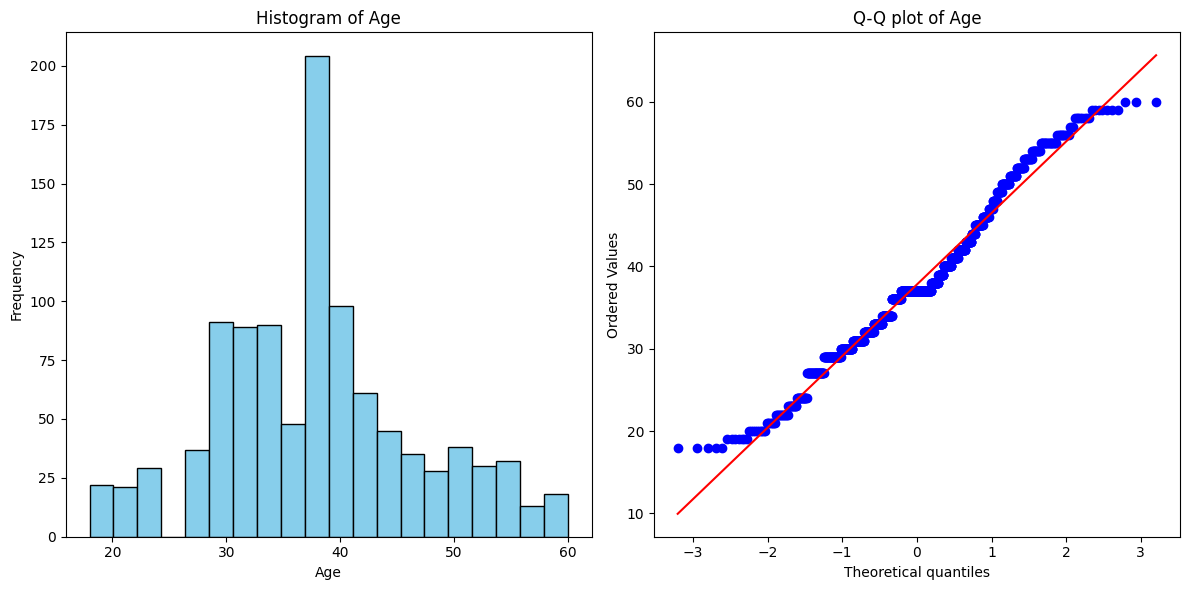

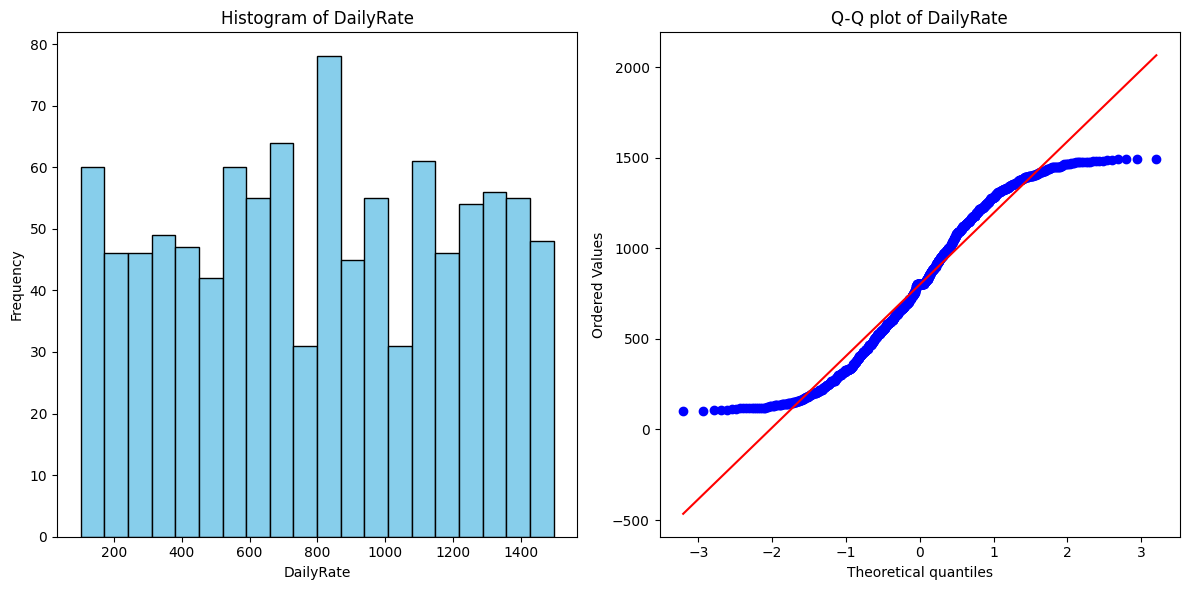

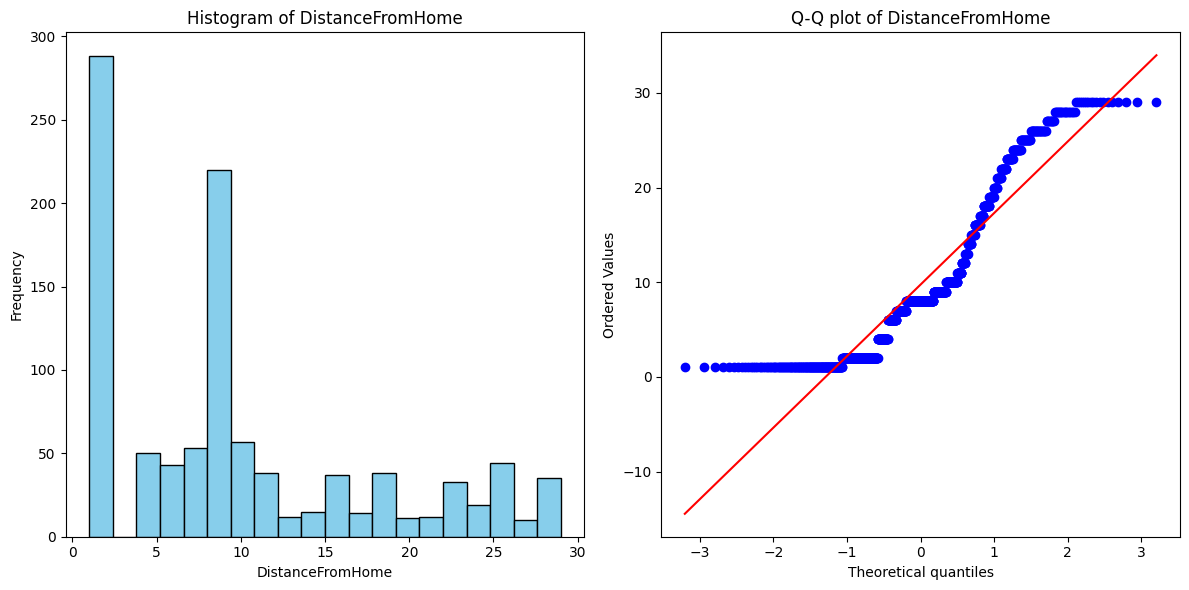

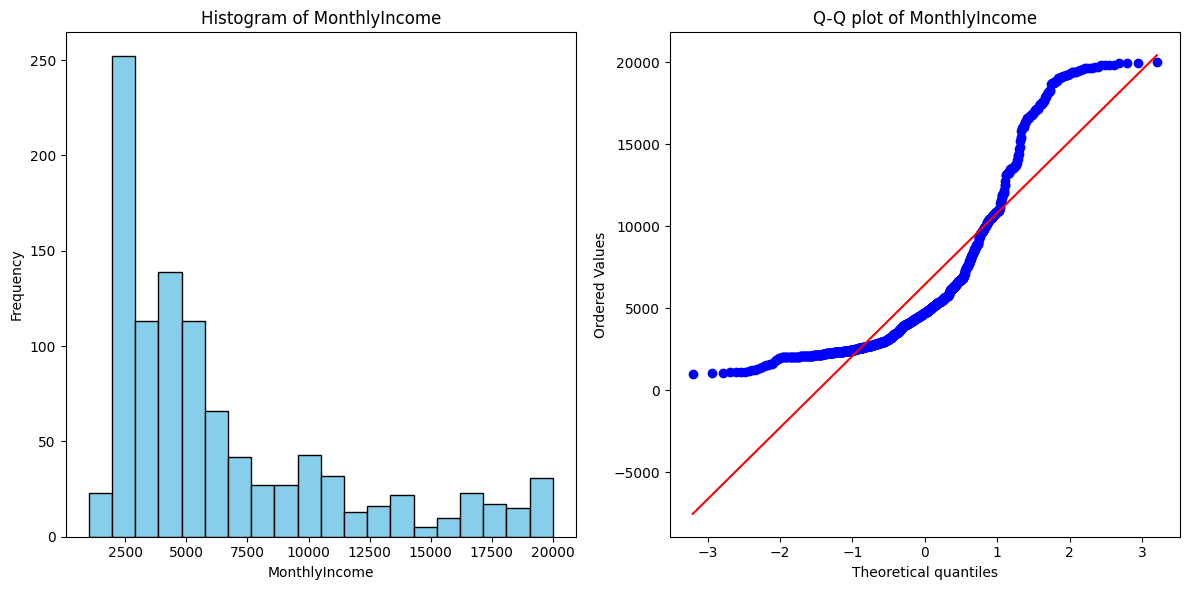

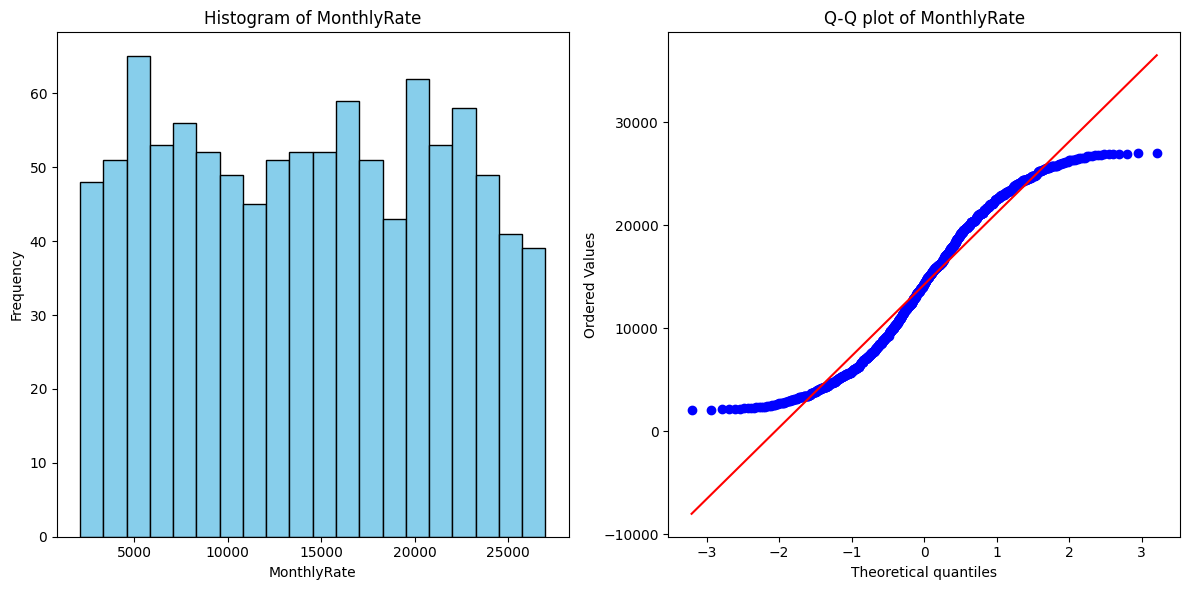

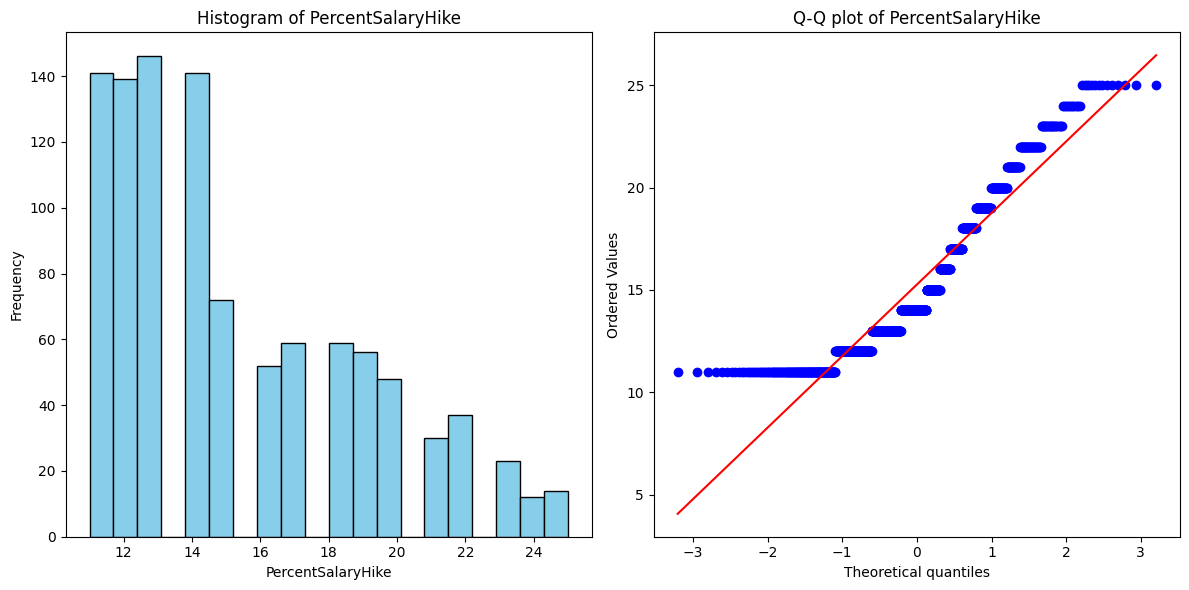

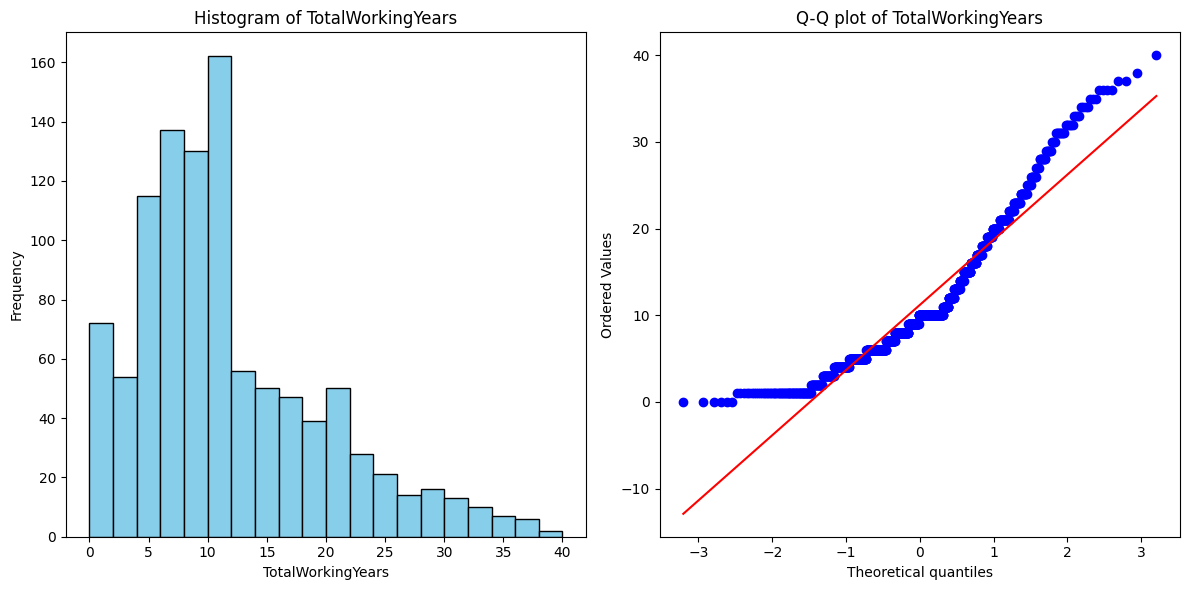

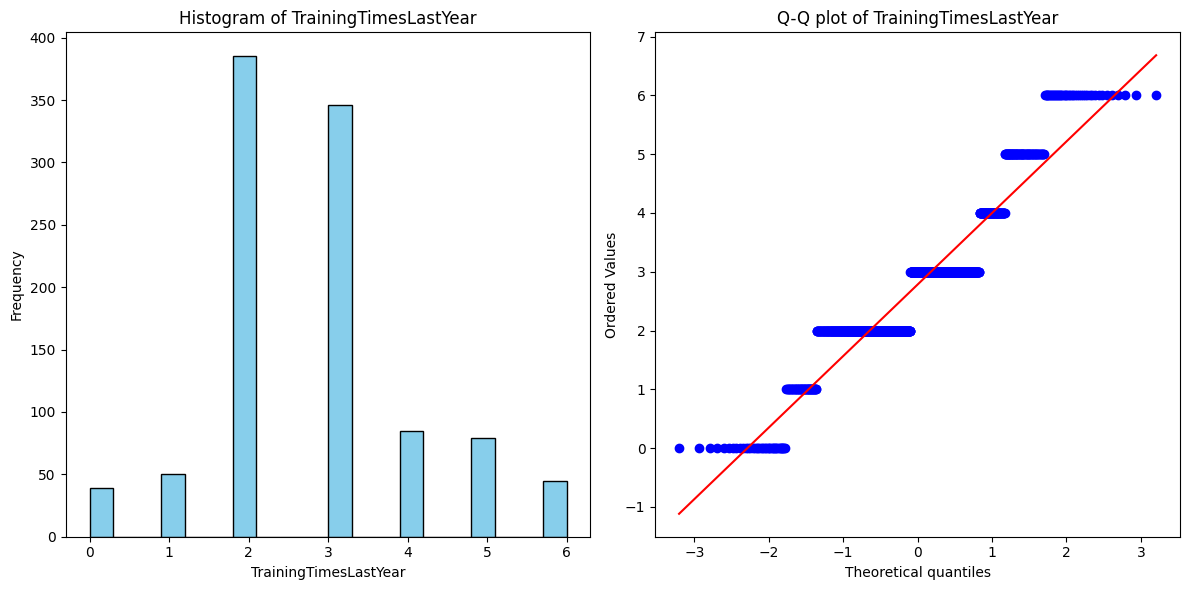

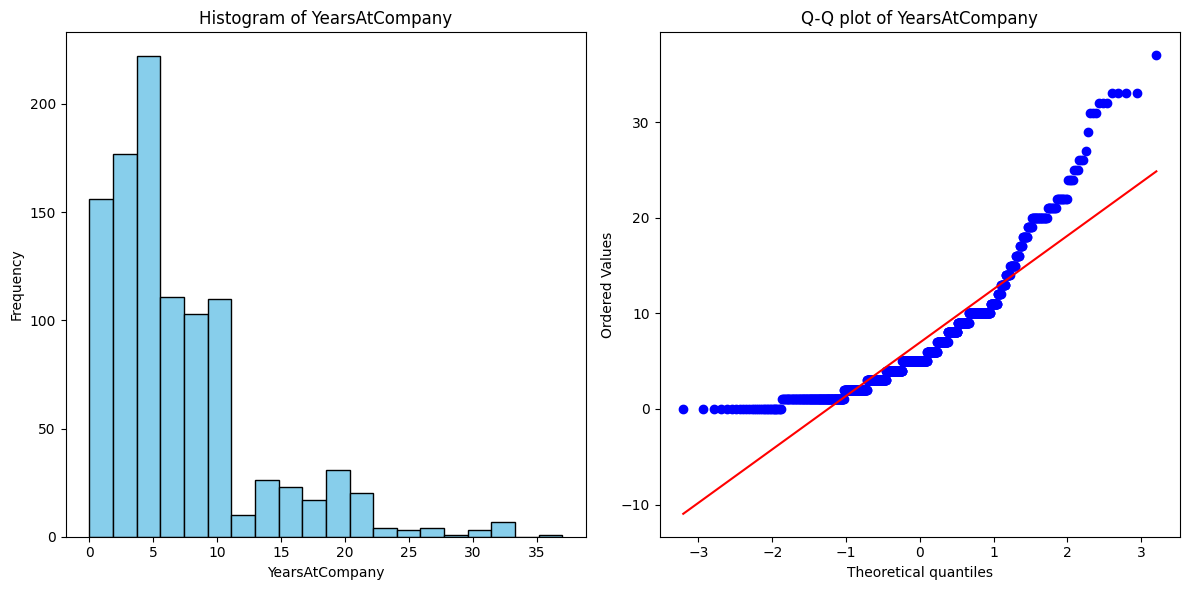

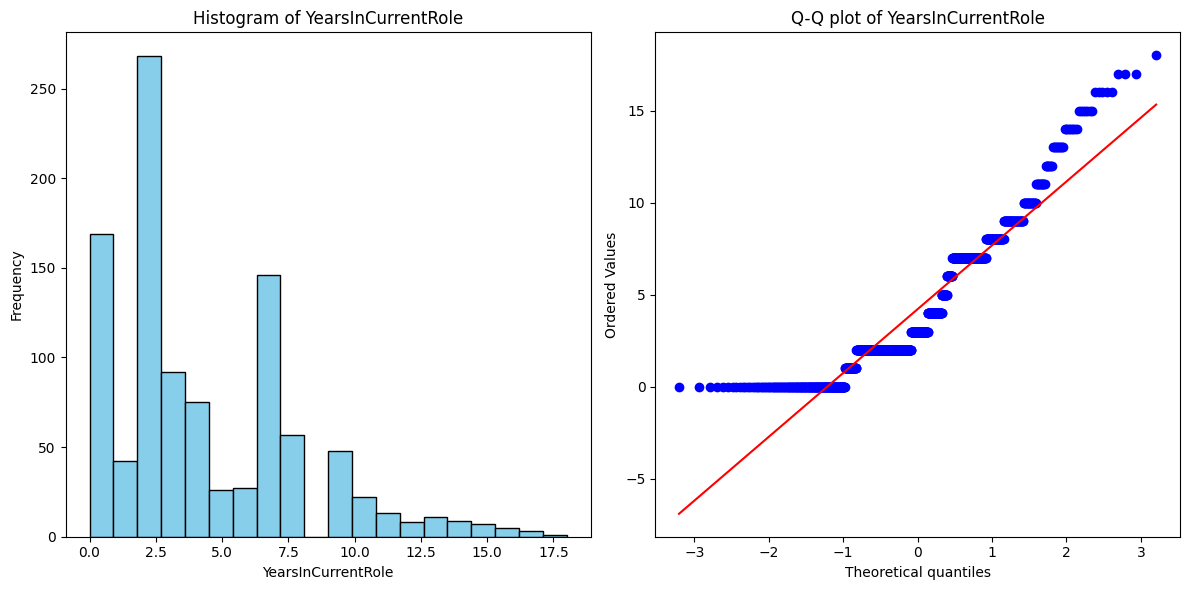

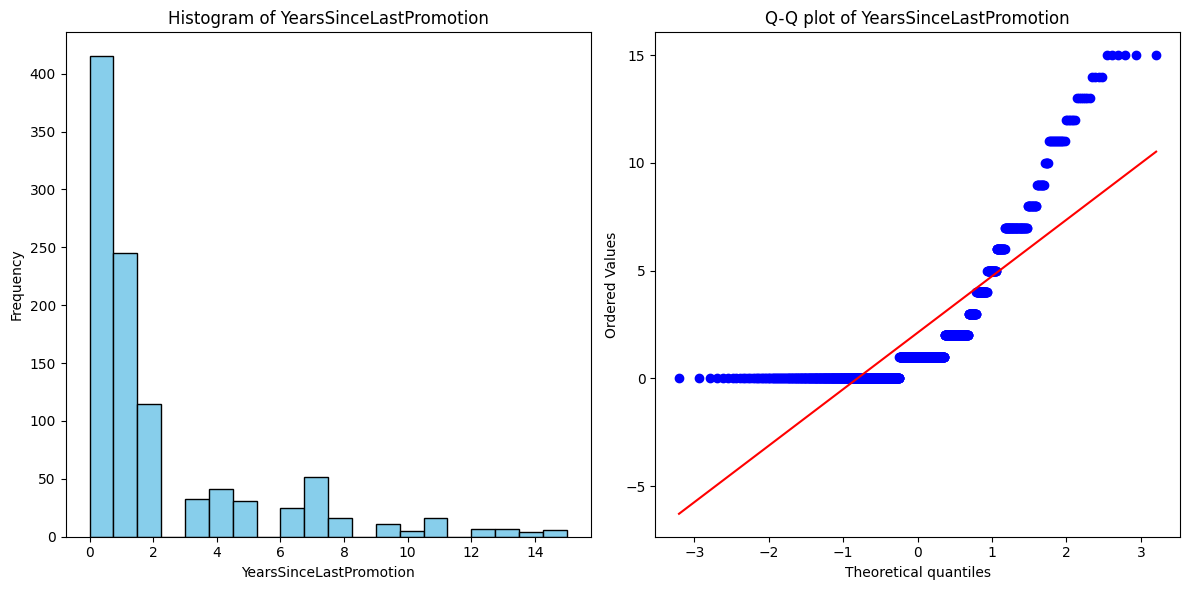

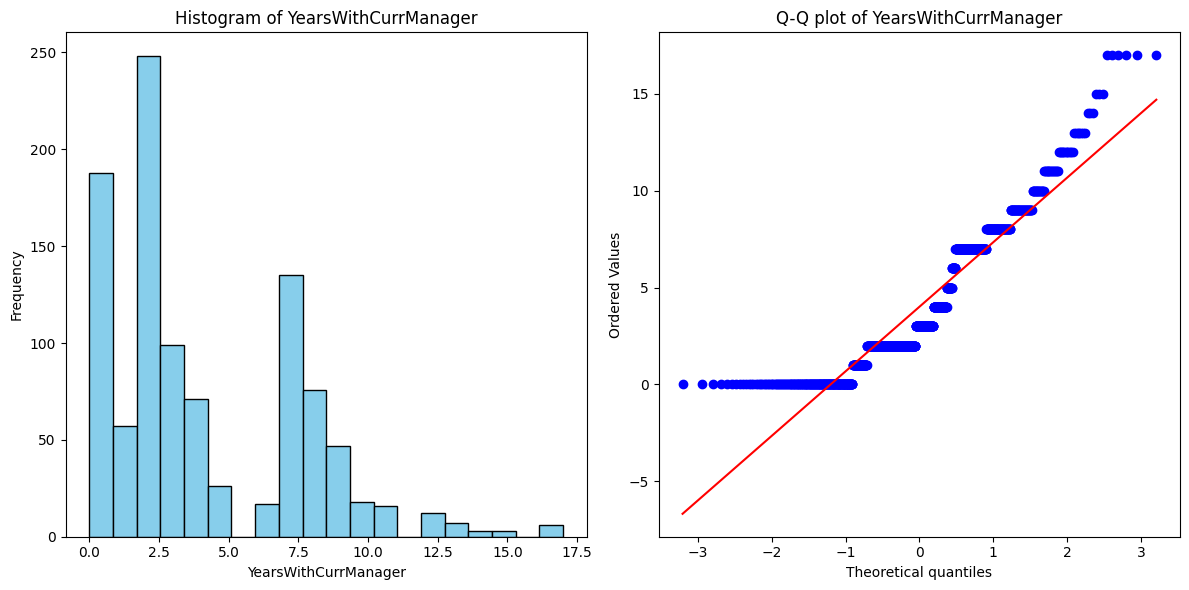

In [6]:
numerical_columns = [
    'Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome', 'MonthlyRate',
    'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
    'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
    'YearsWithCurrManager'
]

for col in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))

    # Histogram
    axes[0].hist(employee_data[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    axes[0].set_title(f'Histogram of {col}')
    axes[0].set_xlabel(col)
    axes[0].set_ylabel('Frequency')

    # Q-Q plot
    stats.probplot(employee_data[col].dropna(), dist="norm", plot=axes[1])
    axes[1].set_title(f'Q-Q plot of {col}')

    plt.tight_layout()
    plt.show()


/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition(
/usr/local/lib/python3.10/dist-packages/numpy/lib/function_base.py:4824: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  arr.partition

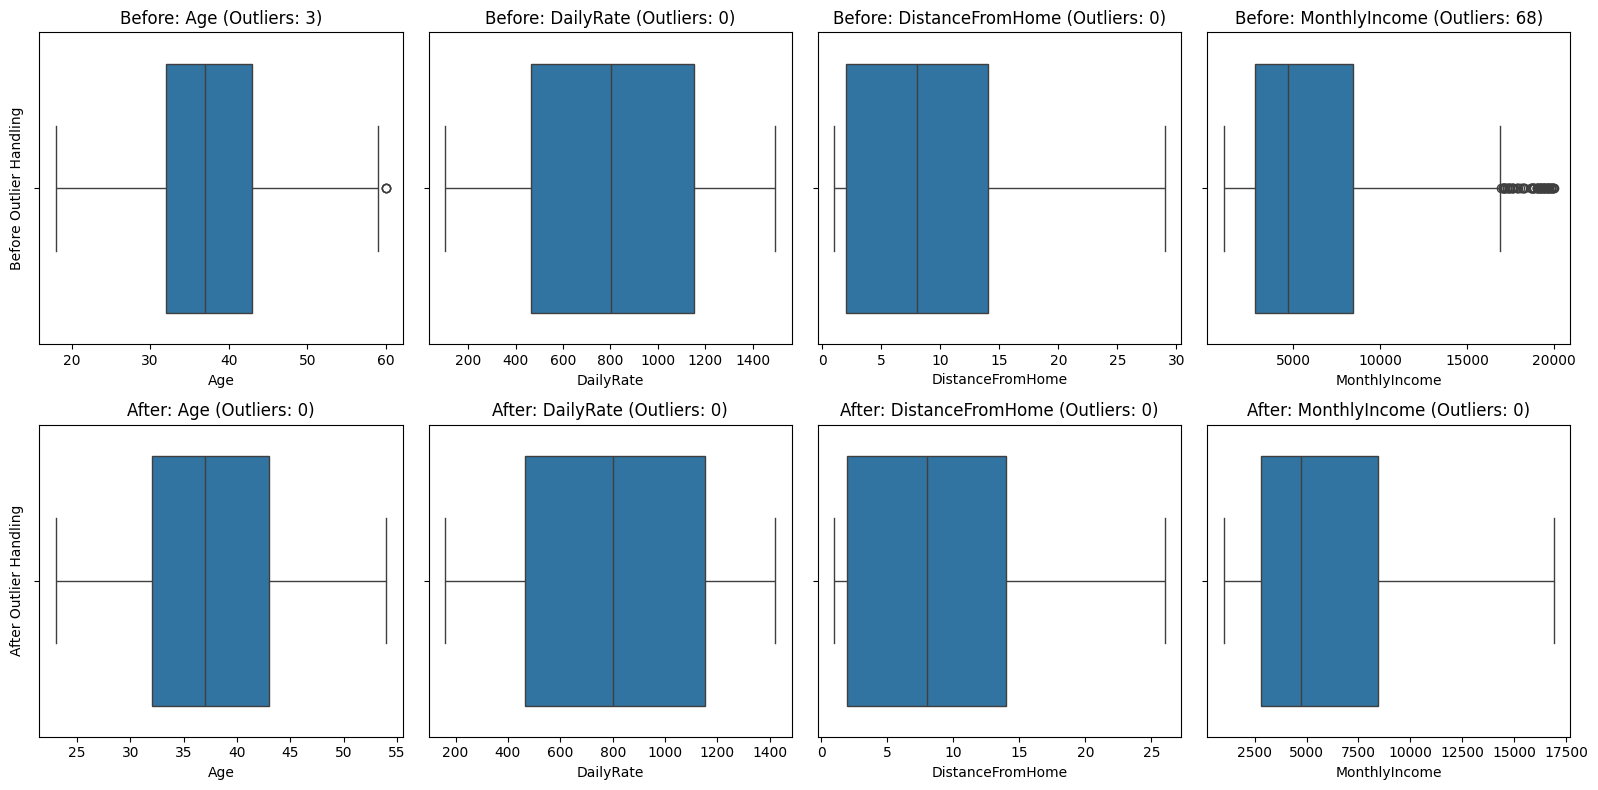

Initial Outlier Counts: {'Age': 3, 'DailyRate': 0, 'DistanceFromHome': 0, 'MonthlyIncome': 68}
Final Outlier Counts after Winsorizing/Clipping: {'Age': 0, 'DailyRate': 0, 'DistanceFromHome': 0, 'MonthlyIncome': 0}


In [ ]:


columns_to_check = ['Age', 'DailyRate', 'DistanceFromHome', 'MonthlyIncome']

def count_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers)

def handle_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    if column == 'MonthlyIncome':
        df[column] = df[column].apply(lambda x: upper_bound if x > upper_bound else (lower_bound if x < lower_bound else x))
    else:
        df[column] = winsorize(df[column], limits=[0.05, 0.05])

initial_outlier_counts = {col: count_outliers(employee_data, col) for col in columns_to_check}

fig, axes = plt.subplots(2, len(columns_to_check), figsize=(16, 8), tight_layout=True)

for i, col in enumerate(columns_to_check):
    sns.boxplot(data=employee_data, x=col, ax=axes[0, i])
    axes[0, i].set_title(f'Before: {col} (Outliers: {initial_outlier_counts[col]})')

for col in columns_to_check:
    handle_outliers(employee_data, col)

final_outlier_counts = {col: count_outliers(employee_data, col) for col in columns_to_check}

for i, col in enumerate(columns_to_check):
    sns.boxplot(data=employee_data, x=col, ax=axes[1, i])
    axes[1, i].set_title(f'After: {col} (Outliers: {final_outlier_counts[col]})')

axes[0, 0].set_ylabel("Before Outlier Handling")
axes[1, 0].set_ylabel("After Outlier Handling")

plt.show()

print("Initial Outlier Counts:", initial_outlier_counts)
print("Final Outlier Counts after Winsorizing/Clipping:", final_outlier_counts)


# Analyzation

# No. (1)
* Do different levels of job satisfaction affect employees’ age, daily rate, and monthly income?

The lack of **significant effect** of job satisfaction on **age, daily rate, and monthly income** suggests that job satisfaction is likely influenced by **factors other than these variables**. With correlation values close to zero **(0.01, 0.02, -0.02)**, there's **minimal to no association** between job satisfaction and each of these attributes, indicating they **do not vary together**. Additionally, **MANOVA results with a high p-value** imply that differences in job satisfaction levels do not meaningfully impact age, daily rate, or monthly income, which may be due to job satisfaction being more closely tied to **aspects like work environment, personal fulfillment, or work-life balance** rather than **demographic or financial characteristics** alone.


Correlation between JobSatisfaction and Age: 0.01
Correlation between JobSatisfaction and DailyRate: 0.02
Correlation between JobSatisfaction and MonthlyIncome: -0.02


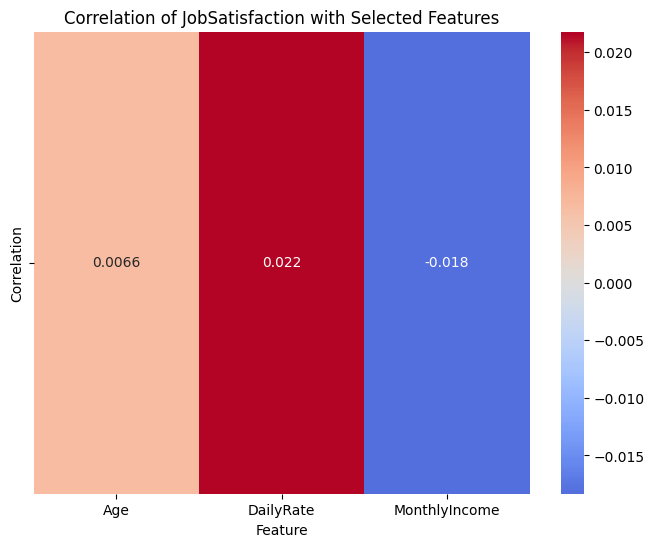

In [ ]:
correlations = {}

for col in ['Age', 'DailyRate', 'MonthlyIncome']:
    correlation = employee_data['JobSatisfaction'].corr(employee_data[col])
    correlations[col] = correlation
    print(f"Correlation between JobSatisfaction and {col}: {correlation:.2f}")

correlation_df = pd.DataFrame(list(correlations.items()), columns=['Feature', 'Correlation']).set_index('Feature')

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_df.T, annot=True, cmap='coolwarm', center=0)
plt.title("Correlation of JobSatisfaction with Selected Features")
plt.show()



No significant effect of Job Satisfaction on Age, DailyRate, and MonthlyIncome.


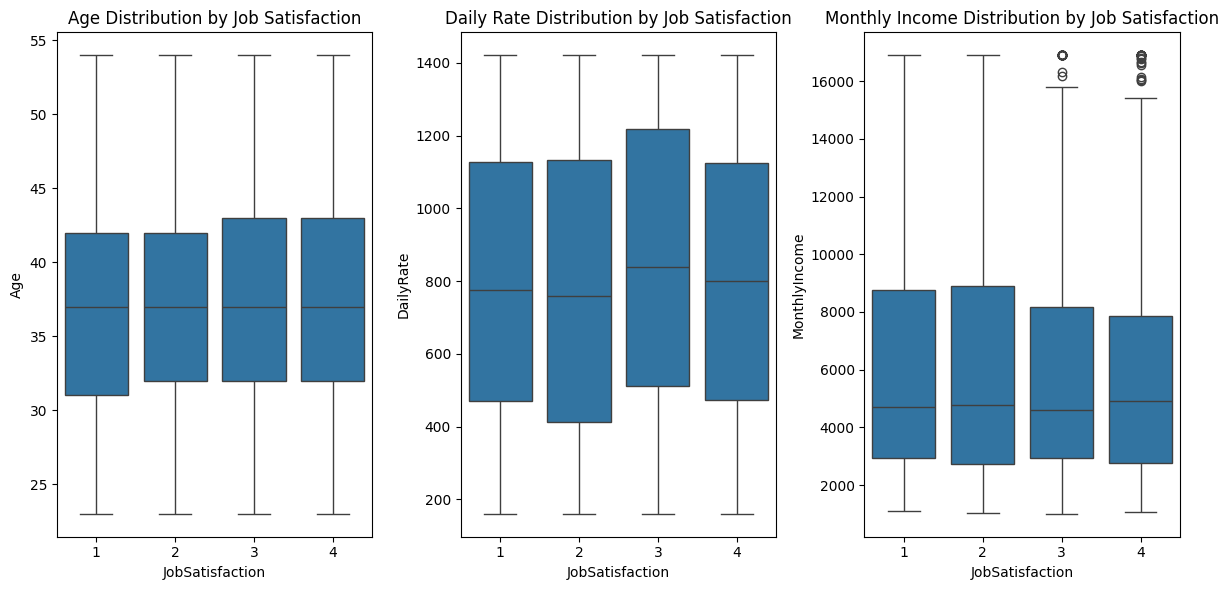

In [ ]:
dependent_vars = ['Age', 'DailyRate', 'MonthlyIncome']
independent_var = 'JobSatisfaction'

manova_model = MANOVA.from_formula('Age + DailyRate + MonthlyIncome ~ JobSatisfaction', data=employee_data)
manova_results = manova_model.mv_test()

if manova_results['JobSatisfaction']['stat']['Pr > F'].iloc[0] < 0.05:
    for var in dependent_vars:
        tukey_results = pairwise_tukeyhsd(employee_data[var], employee_data[independent_var], alpha=0.05)
        print(f"\nTukey HSD Results for {var}:")
        print(tukey_results)
else:
    print("\nNo significant effect of Job Satisfaction on Age, DailyRate, and MonthlyIncome.")

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
sns.boxplot(x=independent_var, y='Age', data=employee_data)
plt.title('Age Distribution by Job Satisfaction')

plt.subplot(1, 3, 2)
sns.boxplot(x=independent_var, y='DailyRate', data=employee_data)
plt.title('Daily Rate Distribution by Job Satisfaction')

plt.subplot(1, 3, 3)
sns.boxplot(x=independent_var, y='MonthlyIncome', data=employee_data)
plt.title('Monthly Income Distribution by Job Satisfaction')

plt.tight_layout()
plt.show()


# No. (2-4)
* Is there a significant difference in age across different job satisfaction levels?

The **Shapiro-Wilk test results** for age across all job satisfaction levels indicate **p-values well below 0.05**, meaning the **data is not normally distributed** within each level. Because of this, a **non-parametric test** like the **Kruskal-Wallis test** is appropriate. The **Kruskal-Wallis test results show high p-values (all > 0.05)** for age, daily rate, and monthly income, indicating **no significant difference** across job satisfaction levels. This suggests that **variations in job satisfaction are not meaningfully associated** with differences in **age, daily rate, or monthly income**.

* Is there a significant difference in daily rate across different job satisfaction levels?

For **daily rate**, the test result with a **p-value of 0.179** also suggests **no significant difference** across job satisfaction levels, meaning **daily rate is consistent regardless of satisfaction level**.

* Is there a significant difference in monthly income across different job satisfaction levels?

Lastly, for **monthly income**, the **high p-value (0.991)** further supports that **monthly income does not vary significantly** with job satisfaction. Therefore, this implies that **variations in job satisfaction are not strongly associated** with differences in age, daily rate, or monthly income.



In [ ]:
for col in ['Age', 'DailyRate', 'MonthlyIncome']:
    for level in employee_data['JobSatisfaction'].unique():
        stat, p = shapiro(employee_data[employee_data['JobSatisfaction'] == level][col])
        print(f"Normality / Shapiro-Wilk test for {col} at Job Satisfaction Level {level}: p-value = {p}")


Normality / Shapiro-Wilk test for Age at Job Satisfaction Level 4: p-value = 2.238079353912443e-08
Normality / Shapiro-Wilk test for Age at Job Satisfaction Level 2: p-value = 8.163907272921499e-06
Normality / Shapiro-Wilk test for Age at Job Satisfaction Level 3: p-value = 1.0090635129217258e-06
Normality / Shapiro-Wilk test for Age at Job Satisfaction Level 1: p-value = 0.00013743945197804928
Normality / Shapiro-Wilk test for DailyRate at Job Satisfaction Level 4: p-value = 1.240255391318119e-08
Normality / Shapiro-Wilk test for DailyRate at Job Satisfaction Level 2: p-value = 4.279966678418031e-08
Normality / Shapiro-Wilk test for DailyRate at Job Satisfaction Level 3: p-value = 4.5980117001274556e-10
Normality / Shapiro-Wilk test for DailyRate at Job Satisfaction Level 1: p-value = 1.1662129309926695e-06
Normality / Shapiro-Wilk test for MonthlyIncome at Job Satisfaction Level 4: p-value = 1.4491552383792355e-17
Normality / Shapiro-Wilk test for MonthlyIncome at Job Satisfaction Le

In [ ]:
from scipy.stats import kruskal
age_kruskal = kruskal(*(employee_data[employee_data['JobSatisfaction'] == level]['Age']
                        for level in employee_data['JobSatisfaction'].unique()))
daily_rate_kruskal = kruskal(*(employee_data[employee_data['JobSatisfaction'] == level]['DailyRate']
                              for level in employee_data['JobSatisfaction'].unique()))
monthly_income_kruskal = kruskal(*(employee_data[employee_data['JobSatisfaction'] == level]['MonthlyIncome']
                                   for level in employee_data['JobSatisfaction'].unique()))

print("Kruskal-Wallis Test Results:")
print("Age:", age_kruskal)
print("Daily Rate:", daily_rate_kruskal)
print("Monthly Income:", monthly_income_kruskal)


Kruskal-Wallis Test Results:
Age: KruskalResult(statistic=0.5332233605682001, pvalue=0.9115340538031781)
Daily Rate: KruskalResult(statistic=4.9013069509510165, pvalue=0.1791682326598948)
Monthly Income: KruskalResult(statistic=0.10423288613741363, pvalue=0.9913246675471504)


**Conclusion**

The findings suggest that job satisfaction levels do not significantly impact Age, Daily Rate, or Monthly Income for this dataset.

# No. (5)
* Which of the dependent variables (age, daily rate, or monthly income) contributes most to the differences between job satisfaction levels?


From the values, DailyRate has the highest eta-squared value (0.00483), indicating that it contributes the most to the differences between job satisfaction levels. This suggests that variations in daily rate have a stronger relationship with job satisfaction compared to age and monthly income.

In conclusion, DailyRate contributes the most to the differences in job satisfaction levels.

In [ ]:
import numpy as np
from scipy import stats

def eta_squared(data, groups):
    f_statistic, p_value = stats.f_oneway(*[data[groups == level] for level in np.unique(groups)])

    ss_between = np.sum(np.fromiter(
        ((np.mean(data[groups == level]) - np.mean(data)) ** 2 * np.sum(groups == level) for level in np.unique(groups)),
        dtype=float
    ))

    ss_total = np.sum((data - np.mean(data)) ** 2)

    eta_squared_value = ss_between / ss_total
    return eta_squared_value

eta_squared_age = eta_squared(employee_data['Age'], employee_data['JobSatisfaction'])
eta_squared_dailyrate = eta_squared(employee_data['DailyRate'], employee_data['JobSatisfaction'])
eta_squared_monthlyincome = eta_squared(employee_data['MonthlyIncome'], employee_data['JobSatisfaction'])

print(f"Eta-squared for Age: {eta_squared_age}")
print(f"Eta-squared for DailyRate: {eta_squared_dailyrate}")
print(f"Eta-squared for MonthlyIncome: {eta_squared_monthlyincome}")


Eta-squared for Age: 0.00018789171628830366
Eta-squared for DailyRate: 0.004829360245160145
Eta-squared for MonthlyIncome: 0.0005718383685355274


# No. (6)
# MANOVA
The **multivariate linear model** results indicate **no significant interaction** between job satisfaction levels and the variables **age, daily rate, and monthly income** (Wilks' lambda p-value = 0.7211), meaning **job satisfaction does not alter the relationship** among these variables. The **Levene test results** show **no significant differences in variances** for age, daily rate, or monthly income across job satisfaction levels, confirming **consistent variability** across groups. Additionally, with **low correlations** (below 0.5) among age, daily rate, and monthly income, there is an **absence of multicollinearity**, indicating that **patterns between these variables are independent** and unaffected by job satisfaction levels.



**Multivariate Normality**

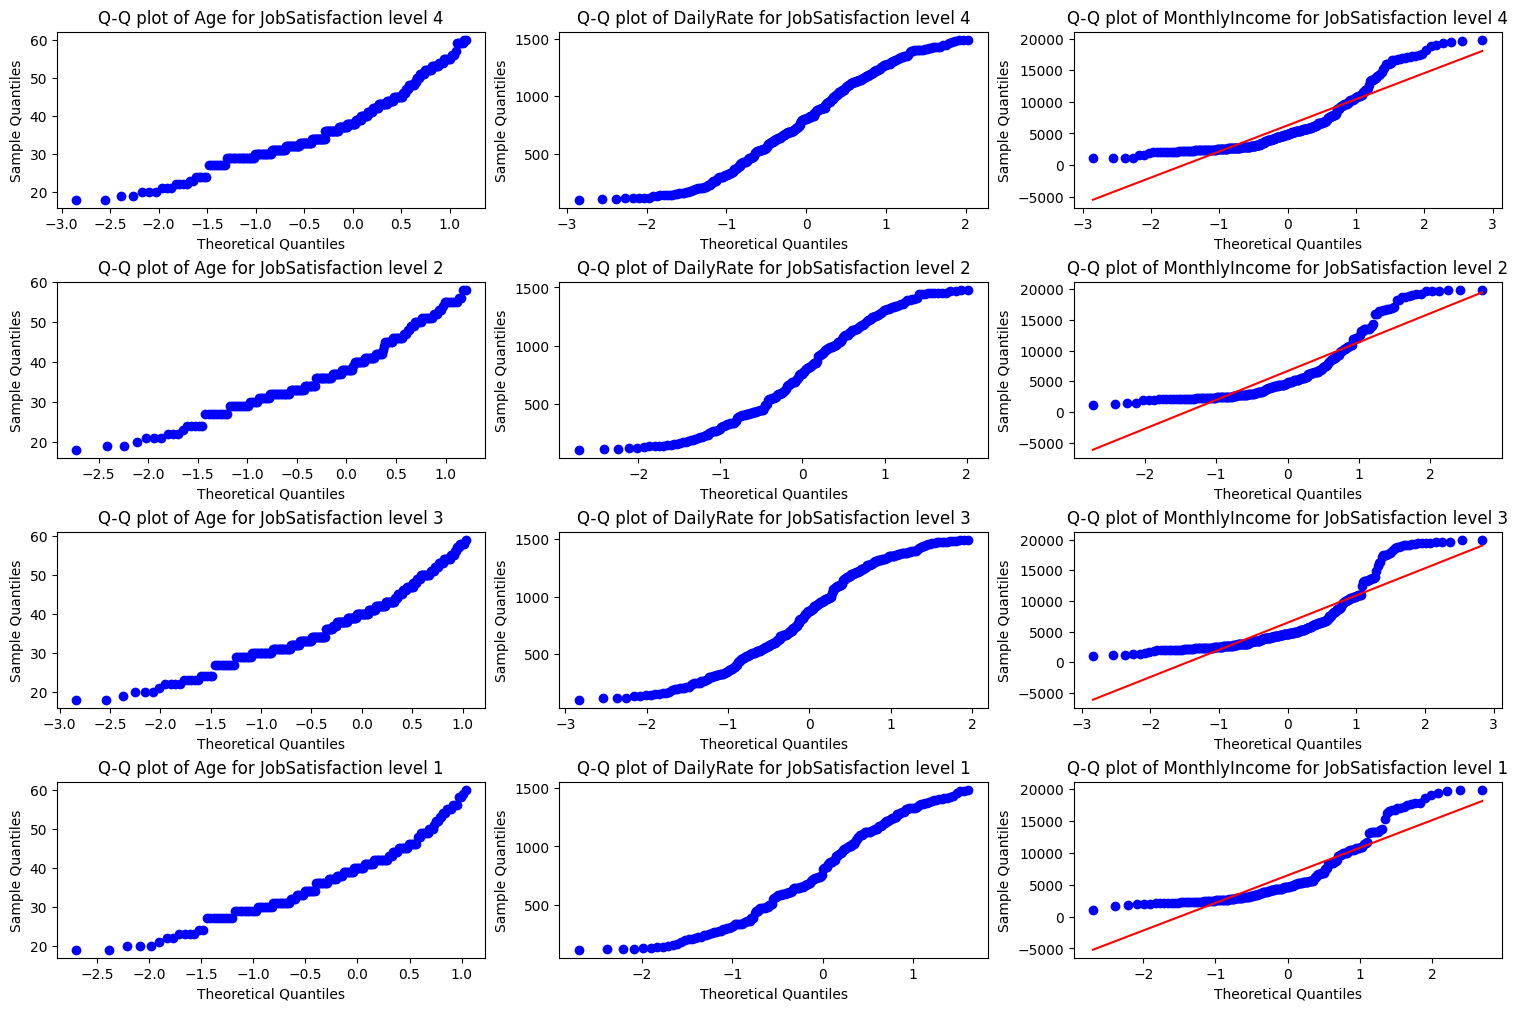

In [ ]:
levels = employee_data['JobSatisfaction'].unique()
columns = ['Age', 'DailyRate', 'MonthlyIncome']

fig, axes = plt.subplots(len(levels), len(columns), figsize=(15, 10), constrained_layout=True)

for i, level in enumerate(levels):
    for j, col in enumerate(columns):
        ax = axes[i, j]
        stats.probplot(employee_data[employee_data['JobSatisfaction'] == level][col], dist="norm", plot=ax)
        ax.set_title(f'Q-Q plot of {col} for JobSatisfaction level {level}')
        ax.set_xlabel('Theoretical Quantiles')
        ax.set_ylabel('Sample Quantiles')

plt.show()


**Homogeneity of Variance-Covariance Matrices**

In [ ]:
from statsmodels.multivariate.manova import MANOVA

manova = MANOVA.from_formula('Age + DailyRate + MonthlyIncome ~ JobSatisfaction', data=employee_data)
print(manova.mv_test())


                   Multivariate linear model
                                                                
----------------------------------------------------------------
       Intercept        Value  Num DF   Den DF   F Value  Pr > F
----------------------------------------------------------------
          Wilks' lambda 0.1704 3.0000 1023.0000 1660.4653 0.0000
         Pillai's trace 0.8296 3.0000 1023.0000 1660.4653 0.0000
 Hotelling-Lawley trace 4.8694 3.0000 1023.0000 1660.4653 0.0000
    Roy's greatest root 4.8694 3.0000 1023.0000 1660.4653 0.0000
----------------------------------------------------------------
                                                                
----------------------------------------------------------------
      JobSatisfaction     Value  Num DF   Den DF  F Value Pr > F
----------------------------------------------------------------
            Wilks' lambda 0.9940 9.0000 2489.8638  0.6873 0.7211
           Pillai's trace 0.0060 9.0000 3075.

In [ ]:
for var in dependent_variables:
    statistic, p_value = levene(*[employee_data[employee_data[independent_variable] == level][var] for level in employee_data[independent_variable].unique()])
    print(f'Levene test for {var}:')
    print(f'Statistic: {statistic}, p-value: {p_value}')


Levene test for Age:
Statistic: 0.13395257968285398, p-value: 0.939834227717693
Levene test for DailyRate:
Statistic: 0.930009069717494, p-value: 0.4255460461894761
Levene test for MonthlyIncome:
Statistic: 0.7148645271914901, p-value: 0.5431831466033106


**Absence of Multicollinearity**

In [ ]:
print(employee_data[['Age', 'DailyRate', 'MonthlyIncome']].corr())


                    Age  DailyRate  MonthlyIncome
Age            1.000000   0.019264       0.491139
DailyRate      0.019264   1.000000       0.021396
MonthlyIncome  0.491139   0.021396       1.000000


# ANALYSIS OF MANOVA

The **absence of significant effects** of job satisfaction levels on **age, daily rate, and monthly income** (1) suggests that these employee attributes **do not vary by job satisfaction**. This finding is reinforced by the **high p-value from the MANOVA test (0.7211)**, indicating no meaningful relationship between job satisfaction and these variables. The **Kruskal-Wallis test results** further confirm this conclusion, with **no significant differences** in **age (2)**, **daily rate (3)**, or **monthly income (4)** across different levels of job satisfaction. These outcomes imply that **job satisfaction is likely influenced by factors other than age, daily rate, or monthly income**, possibly linked to **subjective or environmental factors** like **work-life balance** or **interpersonal relationships** at work.

From the **eta-squared analysis**, **daily rate has the highest eta-squared value (0.00483)**, though still very low, suggesting that **it contributes slightly more to variations in job satisfaction** than age or monthly income (5). However, given that this contribution is minor, **daily rate’s influence on job satisfaction levels is minimal**. Additionally, the **low correlations** among age, daily rate, and monthly income indicate **no multicollinearity**, suggesting that these variables interact independently of job satisfaction levels (6). Together, these findings reinforce the interpretation that **patterns of interaction among age, daily rate, and monthly income remain consistent**, irrespective of employees’ job satisfaction levels.
